In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot


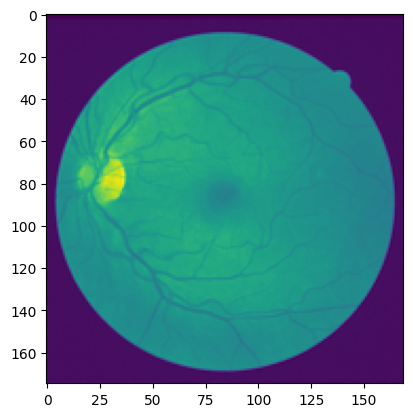

In [2]:
# Load image
percentga_to_reducer = .3
image = Image.open('./DRIVE/Original/01_test.tif').convert('L')
width, height = image.size
resized_dimensions = (int(width * percentga_to_reducer), int(height * percentga_to_reducer))
resized = image.resize(resized_dimensions)
pyplot.imshow(resized)
pyplot.show()
img = np.array(resized)

In [3]:

column, row = img.shape

mask = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

mask = mask / np.sum(mask)
img_convolution = np.zeros((column - 2, row - 2))
print(img[0:3, 0:3])
print("{} , {}".format(column, row))
for index_column in range(0, column - 2):
    for index_row in range(0, row - 2):
        next_column = index_column + 3
        next_row = index_row + 3
        sub_img = img[index_column:next_column, index_row:next_row]
        sub_img = (sub_img * mask) / np.max(img)
        img_convolution[index_column, index_row] = sub_img.sum()
print("New image with convolution")
print(img_convolution)

[[0 0 0]
 [0 1 0]
 [3 3 2]]
175 , 169
New image with convolution
[[0.00456621 0.00456621 0.00405885 ... 0.00659564 0.00659564 0.00710299]
 [0.0152207  0.01572806 0.0152207  ... 0.01725013 0.01725013 0.01775748]
 [0.02536783 0.02587519 0.02587519 ... 0.02790462 0.02790462 0.02891933]
 ...
 [0.03450025 0.03348554 0.03348554 ... 0.0339929  0.0339929  0.03297818]
 [0.0339929  0.03297818 0.03297818 ... 0.03348554 0.03348554 0.03247083]
 [0.03297818 0.03247083 0.03297818 ... 0.0304414  0.03094876 0.02993404]]


In [4]:
X = img_convolution.ravel()
print(X.shape)

number_neural_network = (column - 2)  * (row -2)
number_weight = (column - 2)  * (row -2)
print("Parameters of network", number_neural_network, number_weight)
layer_1 = np.random.randn(number_neural_network, number_weight)
bias = np.ones(number_neural_network)
output = np.zeros(number_neural_network)
for index_mask in range(0,number_neural_network):
    sum_weight = X * layer_1[index_mask]
    output[index_mask] = bias[index_mask] + sum_weight.sum()
print(output)
activation=1/(1 + np.exp(-output))
print(activation)
activation_round = np.clip(np.round(activation),0,1)
print(activation_round)

(28891,)
Parameters of network 28891 28891
[ 12.3061303  -89.52694856  19.67111667 ... -60.07703696  54.79660092
   7.07687463]
[9.99995476e-01 1.31504392e-39 9.99999997e-01 ... 8.10726479e-27
 1.00000000e+00 9.99156304e-01]
[1. 0. 1. ... 0. 1. 1.]


##Calculate the derivate

In [5]:
target = np.ones(number_neural_network)

bias_derivate = - (2 * ((target - activation ) * np.exp(-output))) / np.square(1+ np.exp(-output))
#  print(bias_derivate)

weight_derivate = np.ones((number_neural_network, number_weight))
for index_mask in range(0,number_neural_network):
    weight_derivate[index_mask] = - ((2 * ((target - activation ) * np.exp(-output))) * X) / np.square(1+ np.exp(-output))
# print(weight_derivate)


v_mask = np.concatenate(mask)
row_mask = v_mask.shape[0]
# print(v_mask, row_mask)
mask_derivate = np.zeros(row_mask)
for index_mask in range(0, row_mask):
    double_sum = 0
    for index_nwural in range(0,number_neural_network):
        sum = layer_1[index_mask] * X * v_mask[index_mask]
        double_sum = double_sum + sum.sum()
    mask_error = (((target - activation ) * np.exp(-output)) / np.square(1+ np.exp(-output)) )* double_sum
    mask_derivate[index_mask] = - 2 * mask_error.sum()
mask_derivate_new = np.reshape(mask_derivate, (3,3))
print(mask_derivate)
print(mask_derivate_new)



: 